In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [76]:
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
df.columns = df.columns.str.lower()
for col in df.columns[df.dtypes == object]:
    df[col] = df[col].str.lower()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [37]:
excluded_features = ['alley','masvnrtype','fireplacequ','poolqc','fence','miscfeature']
df_excluded = df.drop(excluded_features,axis=1).copy()

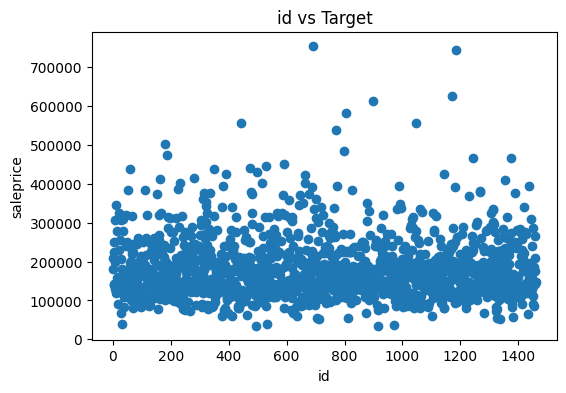

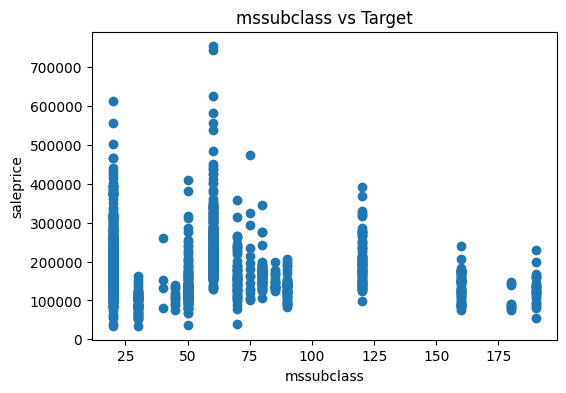

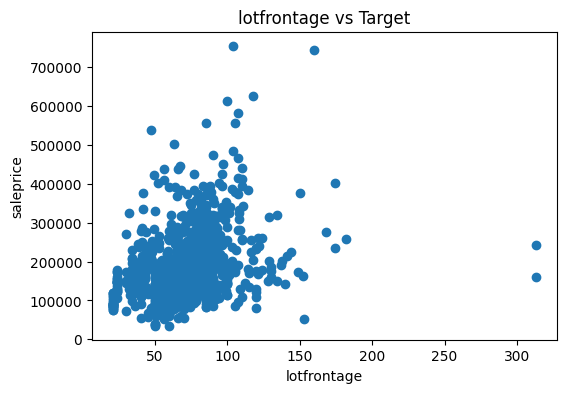

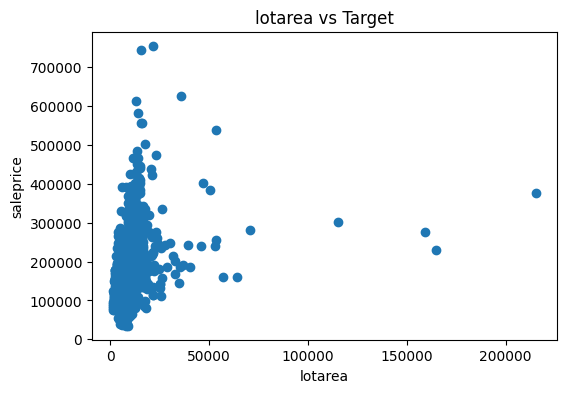

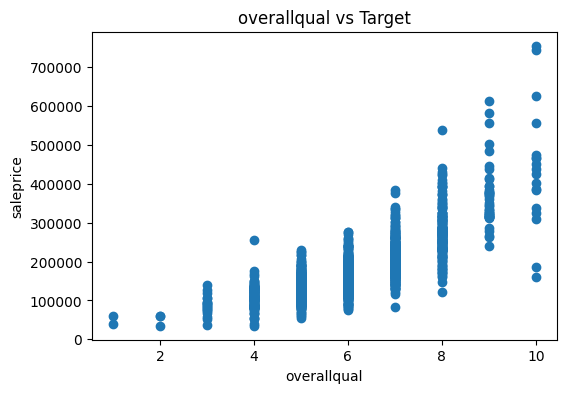

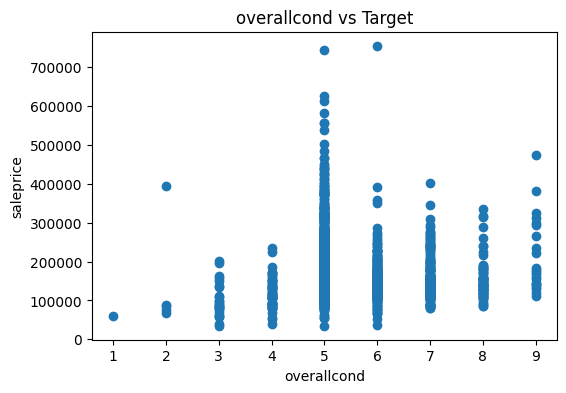

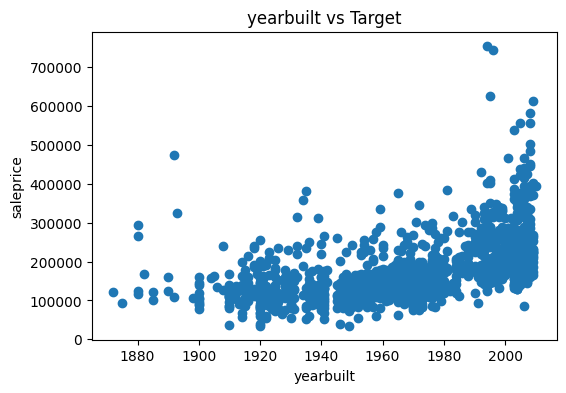

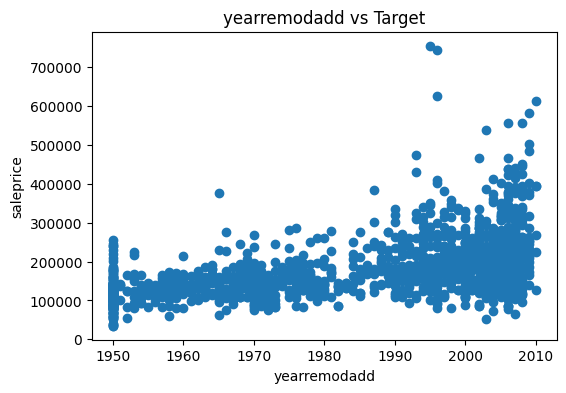

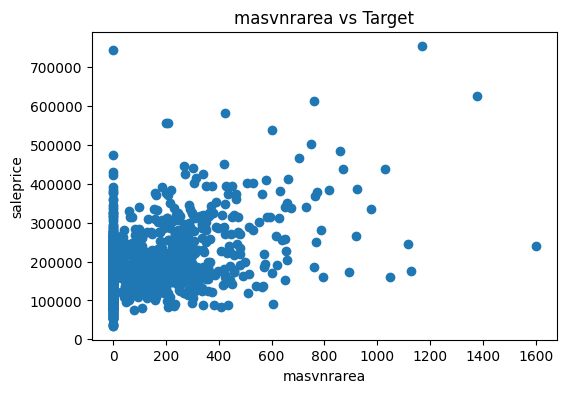

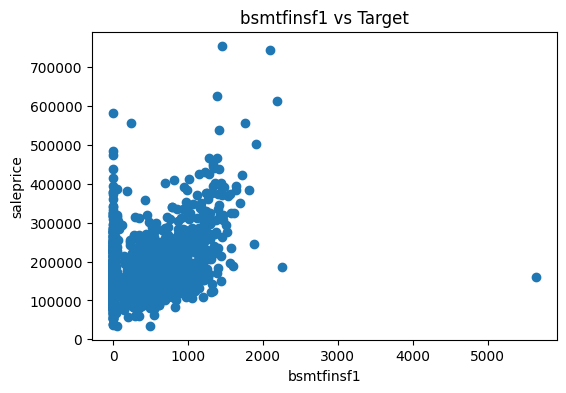

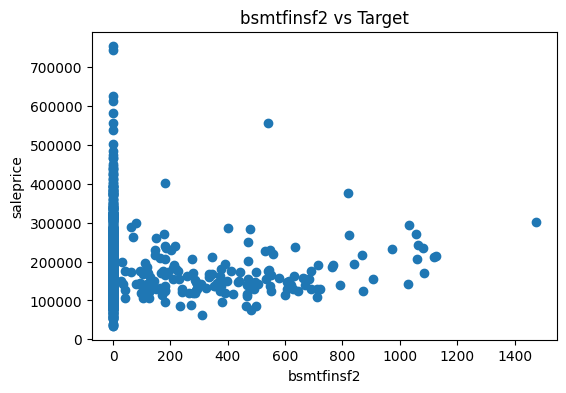

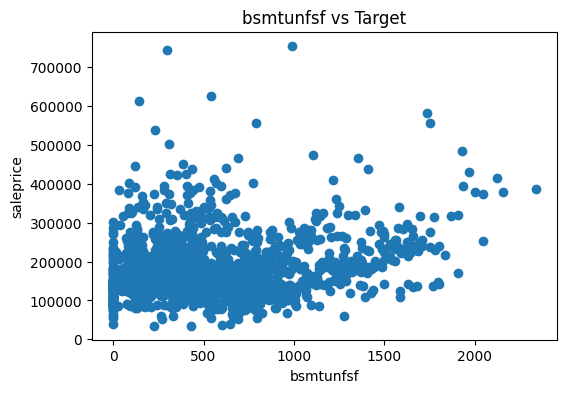

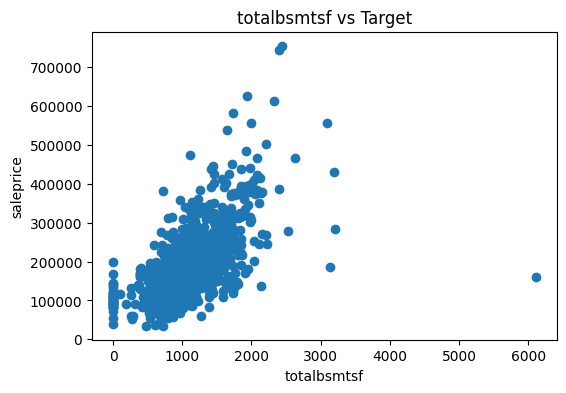

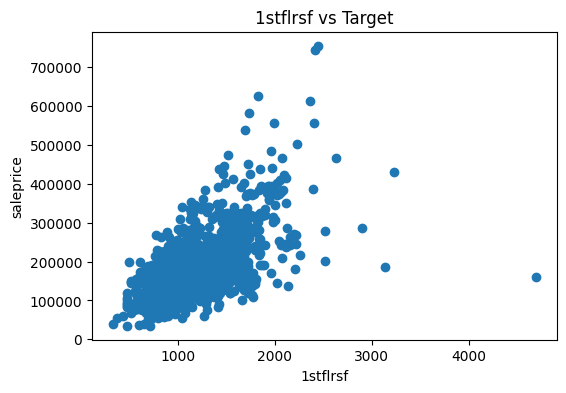

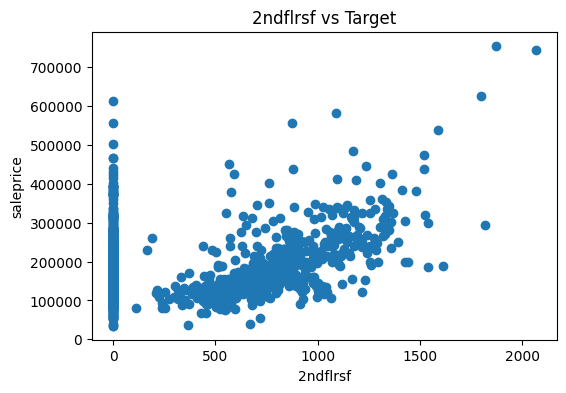

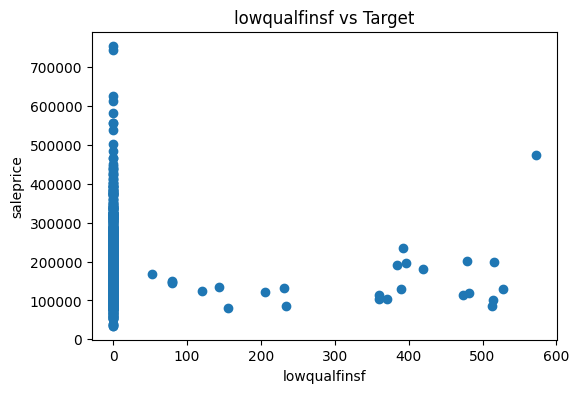

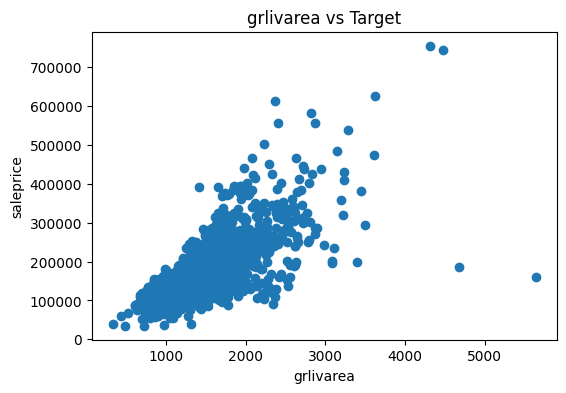

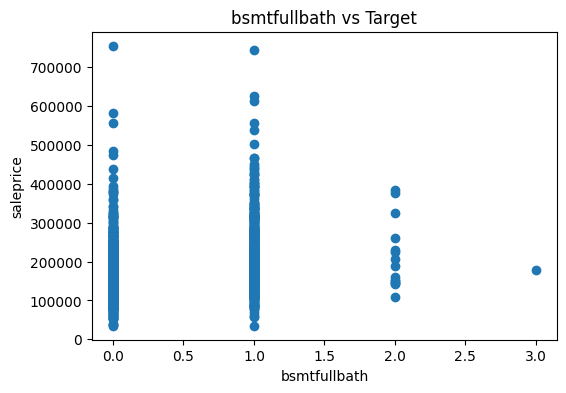

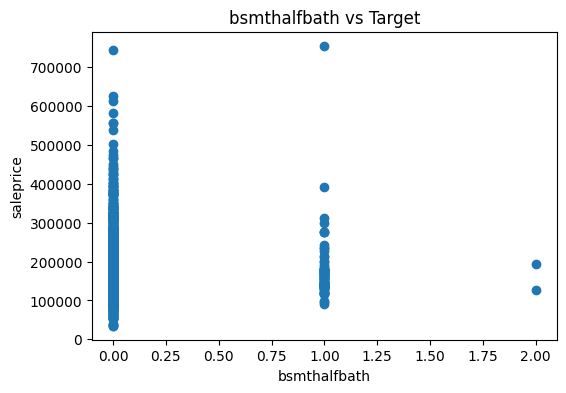

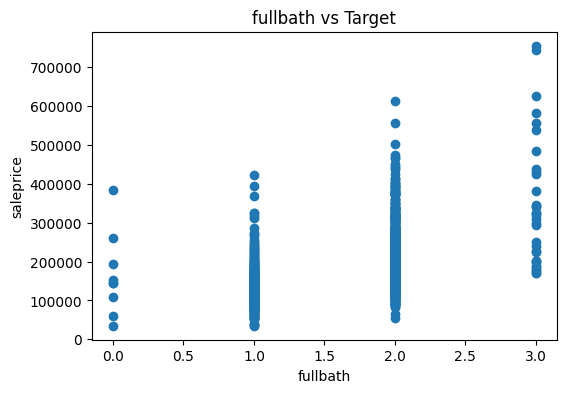

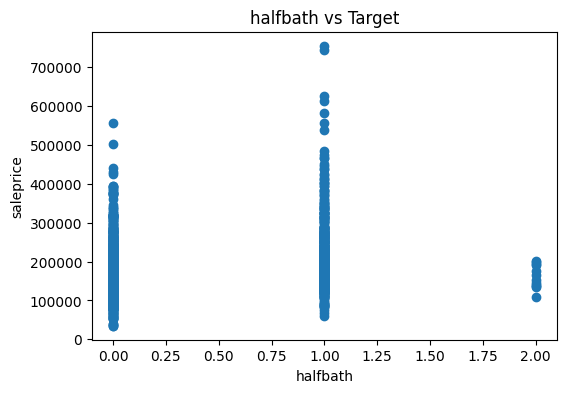

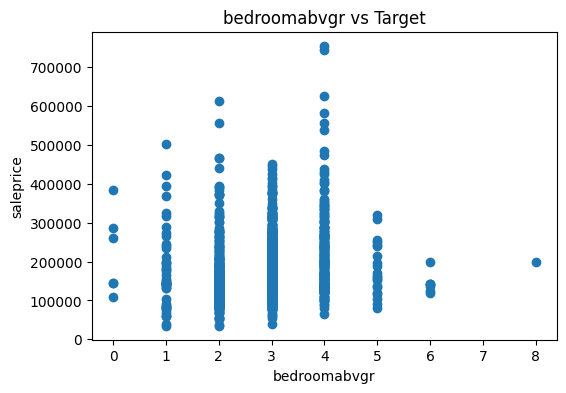

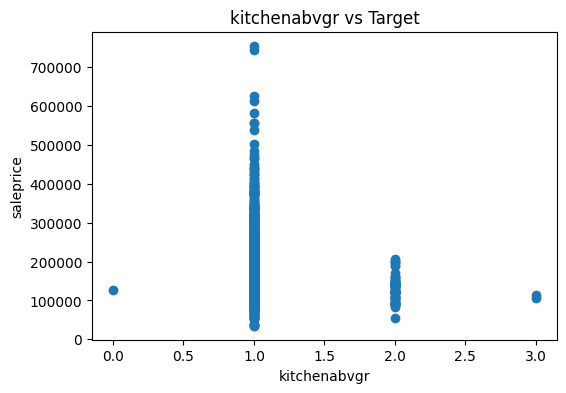

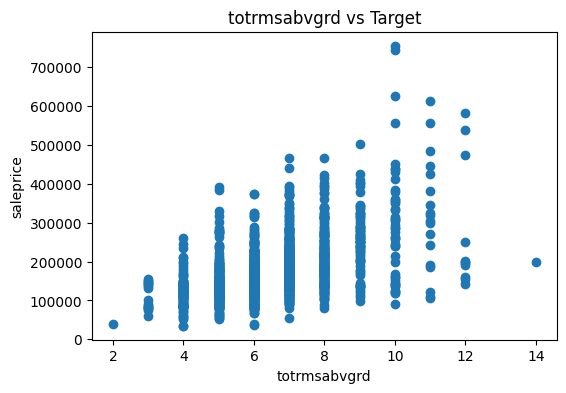

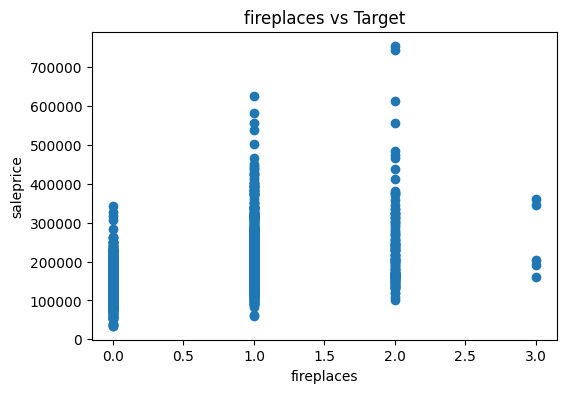

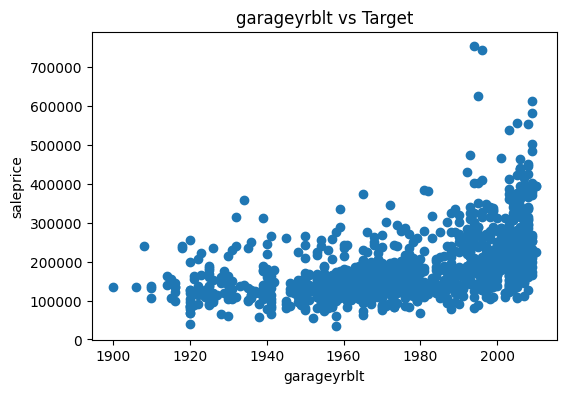

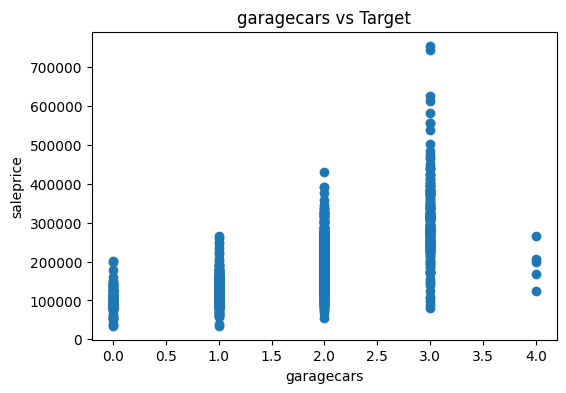

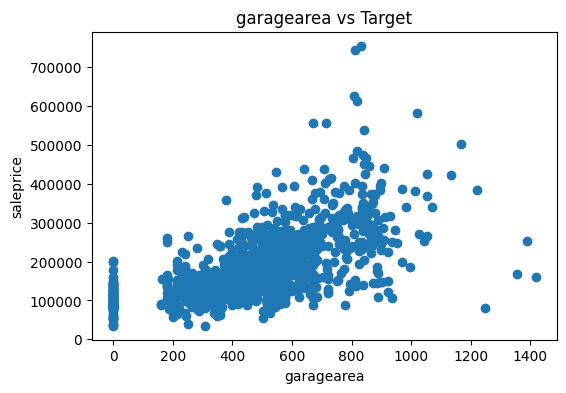

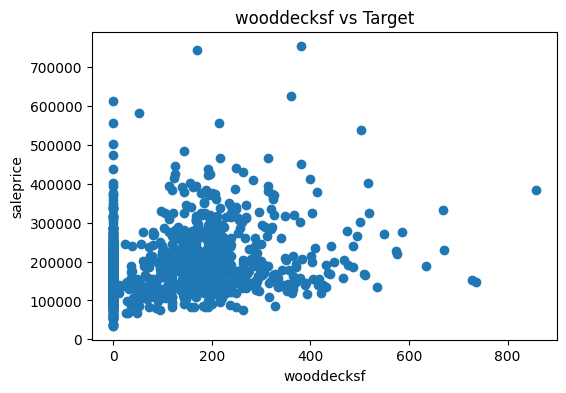

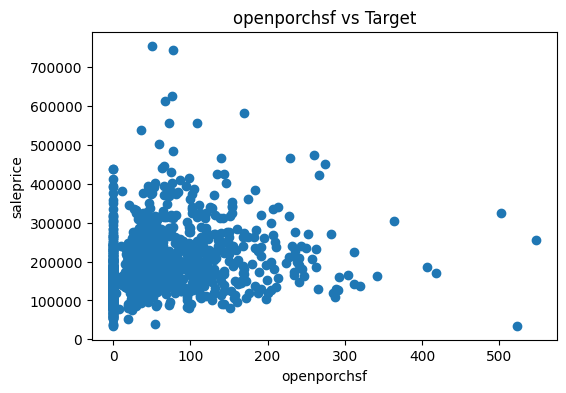

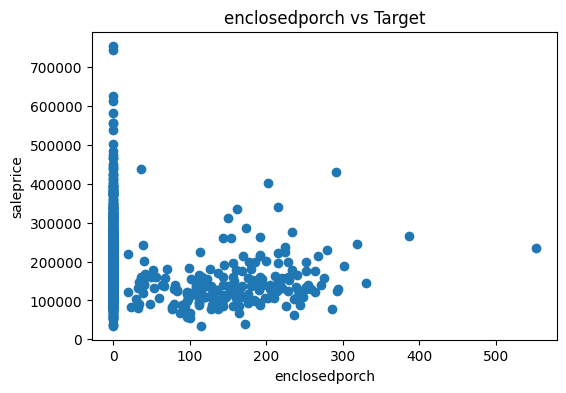

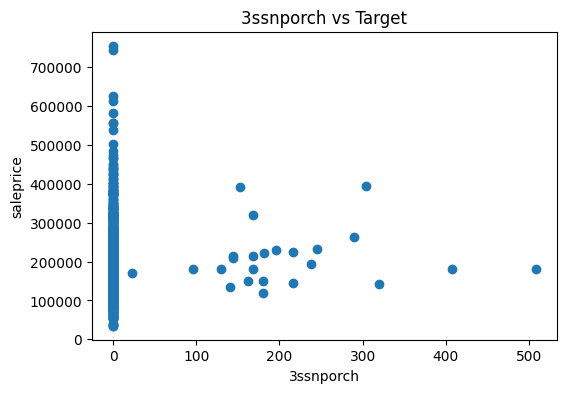

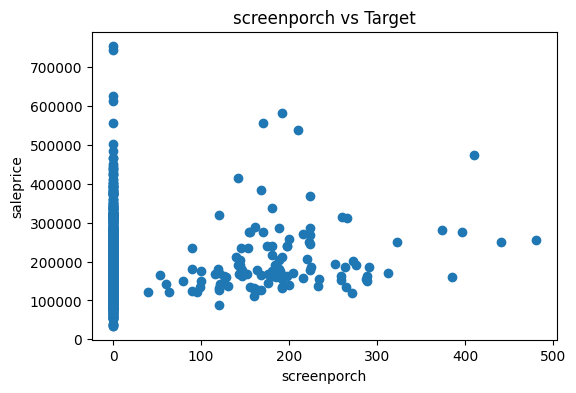

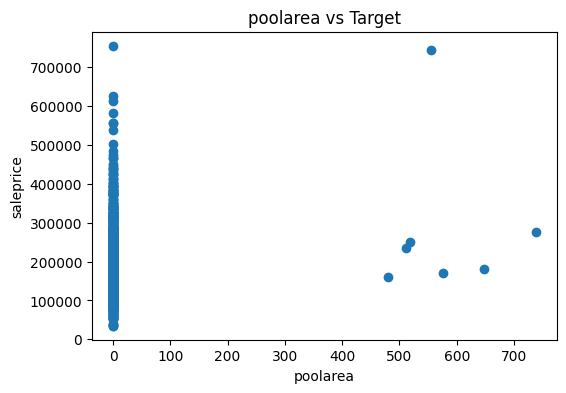

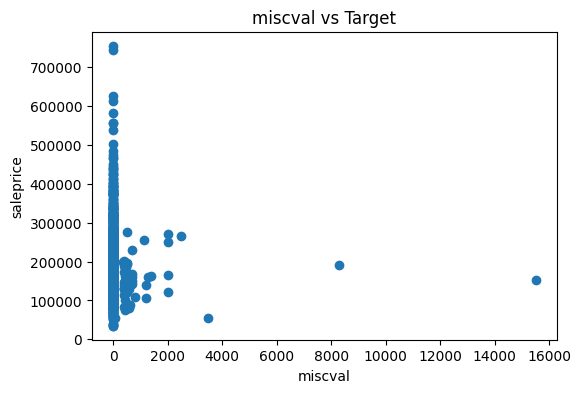

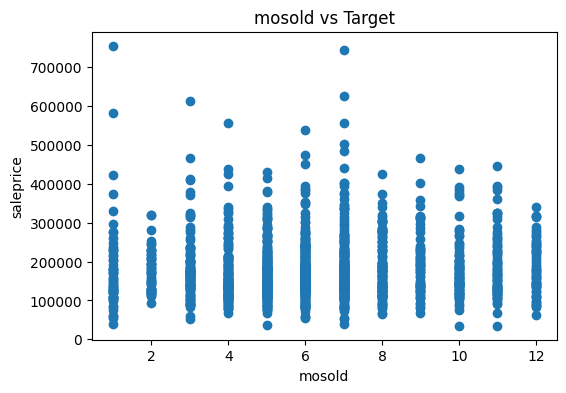

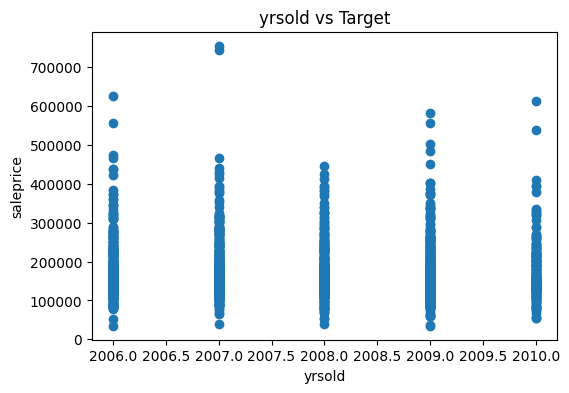

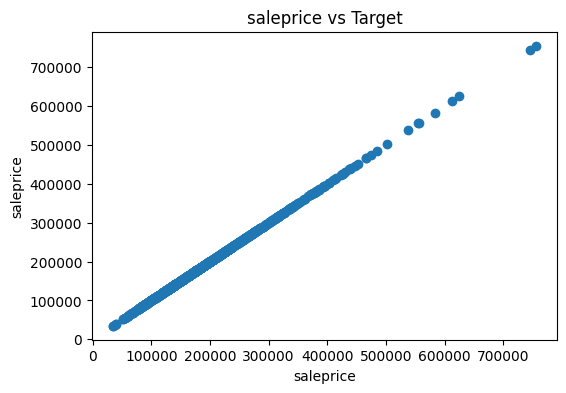

In [38]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
features = df_excluded.columns[df_excluded.dtypes != object]
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['saleprice'])
    plt.xlabel(feature)
    plt.ylabel('saleprice')
    plt.title(f'{feature} vs Target')
    plt.show()

In [39]:
to_be_dropped = ['miscval','yrsold','poolarea','screenporch','3ssnporch','mosold','garageyrblt','kitchenabvgr','lowqualfinsf','bsmtunfsf','bsmtfinsf2','mssubclass'] + excluded_features
to_be_featured_num =['openporchsf','enclosedporch','wooddecksf','fireplaces',('halfbath','fullbath','bsmthalfbath','bsmtfullbath'),('overallcond','overallqual'),('yearbuilt','yearremodadd')]

In [40]:
df_excluded['fireplaceexists'] = df_excluded['fireplaces'] > 0
df_excluded['total_baths'] = 2*df_excluded['halfbath'] + 3*df_excluded['fullbath'] + df_excluded['bsmthalfbath'] + df_excluded['bsmtfullbath']
df_excluded['rating'] = df_excluded['overallqual'] + df_excluded['overallcond'] 
df_excluded['age'] = np.maximum(df_excluded['yearbuilt'],df_excluded['yearremodadd'])
df_excluded['porchexists'] = 4*df_excluded['openporchsf'] - df_excluded['enclosedporch'] + 2*df_excluded['screenporch'] + df_excluded['3ssnporch']
df_excluded['totalsize'] = 2*df_excluded['1stflrsf'] + df_excluded['2ndflrsf']

In [41]:
features_engineered = ['fireplaceexists','total_baths','porchexists','totalsize']
to_be_dropped += ['bsmthalfbath','bsmtfullbath','fireplaces','id']
to_be_dropped

['miscval',
 'yrsold',
 'poolarea',
 'screenporch',
 '3ssnporch',
 'mosold',
 'garageyrblt',
 'kitchenabvgr',
 'lowqualfinsf',
 'bsmtunfsf',
 'bsmtfinsf2',
 'mssubclass',
 'alley',
 'masvnrtype',
 'fireplacequ',
 'poolqc',
 'fence',
 'miscfeature',
 'bsmthalfbath',
 'bsmtfullbath',
 'fireplaces',
 'id']

In [42]:
df_excluded[df_excluded.columns[df_excluded.dtypes != object]].corr()['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overallqual        0.790982
totalsize          0.753012
grlivarea          0.708624
garagecars         0.640409
total_baths        0.639983
garagearea         0.623431
totalbsmtsf        0.613581
1stflrsf           0.605852
rating             0.594786
fullbath           0.560664
totrmsabvgrd       0.533723
yearbuilt          0.522897
age                0.507101
yearremodadd       0.507101
garageyrblt        0.486362
masvnrarea         0.477493
fireplaceexists    0.471908
fireplaces         0.466929
bsmtfinsf1         0.386420
lotfrontage        0.351799
porchexists        0.340499
wooddecksf         0.324413
2ndflrsf           0.319334
openporchsf        0.315856
halfbath           0.284108
lotarea            0.263843
bsmtfullbath       0.227122
bsmtunfsf          0.214479
bedroomabvgr       0.168213
screenporch        0.111447
poolarea           0.092404
mosold             0.046432
3ssnporch          0.044584
bsmtfinsf2        -0.011378
bsmthalfbath      -0

In [43]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
  return mutual_info_score(series, df_excluded[list(df_excluded.columns[df_excluded.dtypes == object]) + ['saleprice']].dropna().saleprice)
df_mi = df_excluded[df_excluded.columns[df_excluded.dtypes == object]].dropna().apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
neighborhood,2.019221
exterior2nd,1.168932
exterior1st,1.104279
bsmtfintype1,0.912742
housestyle,0.716649
bsmtqual,0.686558
kitchenqual,0.661809
garagefinish,0.654776
bsmtexposure,0.600863
exterqual,0.600341


In [70]:
to_be_dropped += ['utilities','street','condition2','heating','roofmatl','lowqualfinsf','mosold','overallcond']
to_be_dropped = list(set(to_be_dropped))
to_be_dropped

['roofmatl',
 'bsmthalfbath',
 'alley',
 'miscfeature',
 'overallcond',
 'heating',
 'mosold',
 'mssubclass',
 'utilities',
 'poolarea',
 'masvnrtype',
 'garageyrblt',
 'bsmtfinsf2',
 'id',
 'yrsold',
 'fireplaces',
 'condition2',
 'poolqc',
 'screenporch',
 'street',
 'miscval',
 'kitchenabvgr',
 'bsmtunfsf',
 '3ssnporch',
 'lowqualfinsf',
 'bsmtfullbath',
 'fence',
 'fireplacequ']

# Preparing model for training


In [79]:
from sklearn.base import BaseEstimator, TransformerMixin


class AttAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self,X, y= None):
        return self
    def transform(self,X, y= None):
        X['fireplaceexists'] = X['fireplaces'] > 0
        X['bathsfeat'] = 2*X['halfbath'] + 3*X['fullbath'] + X['bsmthalfbath'] + X['bsmtfullbath']
        X['porchfeat'] = 4*X['openporchsf'] - X['enclosedporch'] + 2*X['screenporch'] + X['3ssnporch']
        X['sizefeat'] = 2*X['1stflrsf'] + X['2ndflrsf']
        return X
class DfExcluder(BaseEstimator, TransformerMixin):
    def __init__(self, attsExcluded):
        self.attsExcluded = attsExcluded
    def fit(self,X, y= None):
        return self
    def transform(self,X, y= None):
        X = X.drop(self.attsExcluded, axis = 1)
        return X

class DfSelectorNum(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self,X, y= None):
        return self
    def transform(self,X, y= None):
        return X[X.columns[X.dtypes != object]].values

class DfSelectorCat(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self,X, y= None):
        return self
    def transform(self,X, y= None):
        return X[X.columns[X.dtypes == object]].values
    
        

In [81]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
general_pipeline = Pipeline([('attadder', AttAdder()),('dfexcluder',DfExcluder(attsExcluded = to_be_dropped))])
num_pipeline = Pipeline([('selector',DfSelectorNum()),('imputer',SimpleImputer(strategy = 'mean')),('scaler',StandardScaler())])
cat_pipeline = Pipeline([('selector',DfSelectorCat()),('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())])
full_pipeline = FeatureUnion(transformer_list = [('num_pipeline', num_pipeline),('cat_pipeline', cat_pipeline)])


In [106]:
y = df['saleprice'].values
df_tr = full_pipeline.fit_transform(general_pipeline.fit_transform(df.drop('saleprice',axis = 1)))

In [107]:
df_tr.shape

(1460, 228)

# Trying Different Models

In [96]:
from sklearn.linear_model import LinearRegression
X= df_tr
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
dummy = DummyRegressor(strategy = 'mean')

In [99]:
y_pred = lr.predict(X)
rmse(y, y_pred)

25682.41486543929

In [100]:
dummy.fit(X,y)
y_dummy = dummy.predict(X)
rmse(y,y_dummy)

79415.29188606751

In [101]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X,y)
y_pred = svr.predict(X)
rmse(y, y_pred)

72771.70215024917

In [102]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 20)
dt.fit(X,y)
rmse(y, dt.predict(X))

436.0162391111659

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

38426.50939678897

In [108]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth = 20)
forest.fit(X,y)
rmse(y, forest.predict(X))

11382.674532495283

In [92]:
scores = cross_val_score(forest, X, y, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

28897.70380123442

In [ ]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(
    booster='gblinear',  # Use linear model
    objective='reg:squarederror',  # Objective for regression
    eval_metric='rmse'  # Evaluation metric
)
xgb_regressor.fit(X,y)
rmse(y, xgb_regressor.predict(X))


In [ ]:
scores = cross_val_score(xgb_regressor, X, y, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

In [ ]:
scores = cross_val_score(lr, X, y, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

# Tuning Model

In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,30,50],'max_depth':[10,20,50],'max_features':[10,30,50]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50],
                         'max_features': [10, 30, 50],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [110]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 50, 'n_estimators': 50}

In [ ]:
scores = cross_val_score(grid_search.best_estimator_, X, y, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

In [ ]:
forest1 = grid_search.best_estimator_

In [ ]:
param_grid = {'n_estimators':[50,100],'max_depth':[10],'min_samples_leaf':[1,10,100]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X,y)

In [ ]:
grid_search.best_params_

In [111]:
final_model = RandomForestRegressor(max_depth = 20, n_estimators=100)
final_model.fit(X,y)

RandomForestRegressor(max_depth=20)

# Predicting

In [112]:
df_test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
df_test.columns = df_test.columns.str.lower()
for col in df_test.columns[df_test.dtypes == object]:
    df_test[col] = df_test[col].str.lower()

X_test = full_pipeline.transform(general_pipeline.transform(df_test))

In [115]:
predictions = final_model.predict(X_test)

In [118]:
output = df_test[['id']].copy()

In [119]:
output['SalePrice'] = predictions

In [120]:
output.rename(columns={'id': 'Id'}, inplace=True)
output.head()

,Id,SalePrice
0,1461,122880.3300
1,1462,154886.1075
2,1463,183120.5500
3,1464,182472.6750
4,1465,202472.7100


In [121]:
output.to_csv('output.csv', index=False)